# Proving or Disproving a hypothesis using data analysis methods
by Liam Goldstein with Sample Data aggregated by David E. Silva

This report will look at the off-facebook activity of a Facebook user, such as opening other apps. My initial hypothesis is that this user's activates apps more than websites.

### 1. Import the necessary files

In [5]:
from matplotlib import pyplot as plt
import pandas as pd
import json
import time
from datetime import datetime as dt

In [6]:
with open(r'C:\Users\ohiok\datainemat\facebook-davidsilva100046_toshare\ads_and_businesses\your_off-facebook_activity.json') as f:
          offFB = json.load(f)
print(offFB.keys())

dict_keys(['off_facebook_activity'])


### 2. Read the data in the JSON file

We will need to convert your_off-facebook-activity.json to a DataFrame using pandas in order to use the data to create the data visualization later in the program.

In [7]:
offFB_df = pd.DataFrame(offFB['off_facebook_activity'] , columns = ['name', 'events'])
offFB_df.head()

,name,events
0,U.S. Bank - Inspired by customers,"[{'id': 1591992844216198, 'type': 'ACTIVATE_AP..."
1,"Egg, Inc.","[{'id': 665155270935790, 'type': 'ACTIVATE_APP..."
2,AP News,"[{'id': 870613919693099, 'type': 'AD_REQUEST',..."
3,TikTok - Make Your Day,"[{'id': 597615686992125, 'type': 'ACTIVATE_APP..."
4,uoregon.edu,"[{'id': 1638465499548753, 'type': 'PAGE_VIEW',..."


The events section does not contain a clear way to prove or disprove the hypothesis at all, so we want to create a new table with more sections to show the data. We'll need to to use a for loop to iterate i through the app dictionaries.

In [9]:
offFB['off_facebook_activity'][0]['events'][0]['type'] == 'ACTIVATE_APP'

True

In [18]:
apps = []
events = []
actapp = []
custom = []
search = []
viewc = []
ad = []
view = []

for i in offFB['off_facebook_activity']:
    apps.append(i['name'])
    events.append((len(i['events'])))
    actapp.append(len([x for x in i['events'] if x['type'] == 'ACTIVATE_APP']))
    custom.append(len([x for x in i['events'] if x['type'] == 'CUSTOM']))
    search.append(len([x for x in i['events'] if x['type'] == 'SEARCH']))
    viewc.append(len([x for x in i['events'] if x['type'] == 'VIEW_CONTENT']))
    ad.append(len([x for x in i['events'] if x['type'] == 'AD_REQUEST']))
    view.append(len([x for x in i['events'] if x['type'] == 'PAGE_VIEW']))

Create a new table using DataFrame showcasing different numbers foung through specific app actions, such as searches, page views, and the number of times content was viewed on the page.

In [15]:
appbyevent = pd.DataFrame(columns = ('App', 'Event Count', 'Activate App', 'Custom', 'Search', 'View Content', 'Ad Request', 'Page Views'))
appbyevent['App'] = apps
appbyevent['Event Count'] = events
appbyevent['Activate App'] = actapp
appbyevent['Custom'] = custom
appbyevent['Search'] = search
appbyevent['View Content'] = viewc
appbyevent['Ad Request'] = ad
appbyevent['Page Views'] = view
appbyevent.head()

,App,Event Count,Activate App,Custom,Search,View Content,Ad Request,Page Views
0,U.S. Bank - Inspired by customers,18,18,0,0,0,0,0
1,"Egg, Inc.",165,109,0,0,0,35,0
2,AP News,465,133,325,0,0,7,0
3,TikTok - Make Your Day,371,99,267,5,0,0,0
4,uoregon.edu,1,0,0,0,0,0,1


Through this list, we can see that AP News is the app with the most activations. While this does prove my initial hypothesis through this table, we will need to prove that this is true through the use of statistical analysis.

### 3. Create a new list to define a specific variable

We will now create a new list to organize the data more.

In [16]:
from scipy import stats

In [17]:
obs = np.array([appbyevent['Activate App'][:4], appbyevent['Custom'][:4]])
obs

array([[ 18, 109, 133,  99],
       [  0,   0, 325, 267]], dtype=int64)

In [21]:
sub_apps = appbyevent[['App', 'Event Count', 'Activate App', 'Custom', 'Ad Request', 'View Content', 'Page Views']].loc[appbyevent['Event Count'] > 10]
sub_apps

,App,Event Count,Activate App,Custom,Ad Request,View Content,Page Views
0,U.S. Bank - Inspired by customers,18,18,0,0,0,0
1,"Egg, Inc.",165,109,0,35,0,0
2,AP News,465,133,325,7,0,0
3,TikTok - Make Your Day,371,99,267,0,0,0
5,kent.edu,226,0,0,0,102,124
13,Slack,20,1,19,0,0,0
14,bonappetit.com,28,0,16,0,0,12
15,CondÃ© Nast,14,0,14,0,0,0
23,Microsoft Outlook: Organize Your Email & Calendar,72,72,0,0,0,0
30,"Spotify: Listen to new music, podcasts, and songs",29,29,0,0,0,0


Through this list, we can see that the this is all the apps with an event count of over 10. However, we want to look at the app activation and use that for our test.

In [22]:
appbyevent.loc[appbyevent['App'] == "AP News"]

,App,Event Count,Activate App,Custom,Search,View Content,Ad Request,Page Views
2,AP News,465,133,325,0,0,7,0


Now we will create a new list showing if the site is an app or a website entitled "cats"

In [23]:
cats = ['app', 'app', 'app', 'app', 'site', 'app', 'site', 'unknown', 'app', 'app', 'site', 'site', 'site', 'site', 'site', 'site', 'site', 'site', 'unknown', 'app']
cats

['app',
 'app',
 'app',
 'app',
 'site',
 'app',
 'site',
 'unknown',
 'app',
 'app',
 'site',
 'site',
 'site',
 'site',
 'site',
 'site',
 'site',
 'site',
 'unknown',
 'app']

In [24]:
sub_apps['category'] = cats
sub_apps

,App,Event Count,Activate App,Custom,Ad Request,View Content,Page Views,category
0,U.S. Bank - Inspired by customers,18,18,0,0,0,0,app
1,"Egg, Inc.",165,109,0,35,0,0,app
2,AP News,465,133,325,7,0,0,app
3,TikTok - Make Your Day,371,99,267,0,0,0,app
5,kent.edu,226,0,0,0,102,124,site
13,Slack,20,1,19,0,0,0,app
14,bonappetit.com,28,0,16,0,0,12,site
15,CondÃ© Nast,14,0,14,0,0,0,unknown
23,Microsoft Outlook: Organize Your Email & Calendar,72,72,0,0,0,0,app
30,"Spotify: Listen to new music, podcasts, and songs",29,29,0,0,0,0,app


### 4. Use a T-Test to analyze the data in a statistical manner

We will need to make a histogram and use a T-Test to analyze the app activations and determine if the apps have the most frequent activations of the bunch

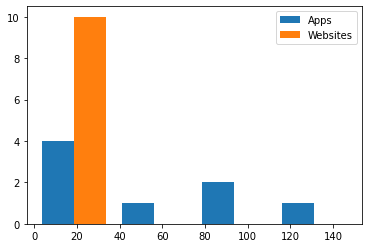

In [25]:
bins = np.linspace(0, 150, 5)
apps = sub_apps['Activate App'].loc[sub_apps['category'] == 'app']
sites = sub_apps['Activate App'].loc[sub_apps['category'] == 'site']
plt.hist([apps, sites], bins, label = ['Apps', 'Websites'])
plt.legend(loc = 'upper right')
plt.show()

The T-Test will compare the app activations of both the apps and the websites. Whichever number is higher than the other is the catagory that was visited more frequently.

In [29]:
ttest_activateapp = stats.ttest_ind(sub_apps['Activate App'].loc[sub_apps['category'] == 'app'], sub_apps['Activate App'].loc[sub_apps['category'] == 'site'])
ttest_activateapp

Ttest_indResult(statistic=3.565414232164613, pvalue=0.0025810784902644667)

### 5. Conclusion

After the t-test was completed, my hypothesis has been proved. The user did activate apps more than websites.

### 6. Limitations

Overall though, the limitations with this data involved the data possibly being too short. The event count had to be greater than 10, when there were only 21 sites that did go over 10. However though, this may have been a decent enough number to complete the analysis.